# Hydrogen Molecule 
We're going to explore the approximate solutions to the hydrogen molecular ion and the hydrogen molecule, so that we can gain a better understanding of the construction and intrepertation of approximate molecular basis functions. 

We're going to construct a very basic approximation to the Hydrogen molecule's groundstate using states based on the Hydrogen molecular ion. We'll then explore how to improve upon these approximations using the [variational principle](https://en.wikipedia.org/wiki/Variational_method_(quantum_mechanics)).

The main idea behind the variational principle is that:




## <i class="fa fa-book"></i> Step 1: Preliminaries

In [1]:
# scipy stuff
from scipy.integrate import simps
from scipy.misc import factorial
from scipy.special import genlaguerre, binom, eval_genlaguerre
from scipy.integrate import simps, quad
# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# numpy
import numpy as np
# Qworld
import os
import sys
sys.path.append('../library')
sys.path.append('../../library')
sys.path.append('/home/student/chem160/library')
#This is how we'll import our own home-made modules
import quantumWorld as qworld


## Step 3: $H_2$ - The First Try

Here we can see the different interactions we have to take in to account:
![](files/hydrogen_inter.png)

The Hydrogen molecule has the following hamiltonian:
$$ H = -\frac{\hbar^2}{2m_e}\left( \nabla_1^2 + \nabla_2^2 \right) - \frac{e^2}{4 \pi \epsilon_0 r_{1A}} - \frac{e^2}{4 \pi \epsilon_0 r_{1B}} - \frac{e^2}{4 \pi \epsilon_0 r_{2A}} - \frac{e^2}{4 \pi \epsilon_0 r_{2B}} + \frac{e^2}{4 \pi \epsilon_0 r_{12}} + \frac{e^2}{4 \pi \epsilon_0 r_{AB}}$$

Which looks substantially more complicated than before. We note that the electronic hamiltonian in atomic units is just given by:
$$ H = -\left( \nabla_1^2 + \nabla_2^2 \right) - \frac{e^2}{r_{1A}} - \frac{e^2}{r_{1B}} - \frac{e^2}{r_{2A}} - \frac{e^2}{r_{2B}} + \frac{e^2}{r_{12}}$$
$$ H = H_{1c} + H_{2c} + \frac{e^2}{r_{12}},$$
where
$$H_{1c} = -\nabla_1^2 - \frac{e^2}{r_{1A}} - \frac{e^2}{r_{1B}} $$
and
$$H_{2c} = -\nabla_2^2 - \frac{e^2}{r_{2A}} - \frac{e^2}{r_{2B}}.$$

We're going to assume that our ground state wavefunction can be written in the form:
$$ \psi_g = \frac{1}{\sqrt{2}} \psi_1^1 \psi_2^2\left( \sigma^1_\uparrow \sigma^2_\downarrow - \sigma^2_\uparrow \sigma^1_\downarrow \right),$$
where,
$$ \psi_1 = \frac{N_1}{\sqrt{\pi}} \left( e^{-r_A} + e^{-r_B}\right) $$
$$ \psi_2 = \frac{N_2}{\sqrt{\pi}} \left( e^{-r_A} - e^{-r_B}\right) $$
and we will use
$$\phi_1 = \frac{1}{\sqrt{\pi}} e^{-r_A} $$
and
$$\phi_2 = \frac{1}{\sqrt{\pi}} e^{-r_B} $$
and the superscript denotes the electron occupying that orbital. Note that $S^2(\psi_g) = 0.$

### The complete calculations
#### For sake of completeness, but it's it not important to understand the details

Using the wavefunction that we've defined above, we can then move on to computing our electronic energy using the following integral:
$$E_g^E = \int \int \psi_1^1 \psi_1^2 \left( H_{1C} + H_{2C} + \frac{1}{r_{12}} \right) \psi_1^1 \psi_1^2 d^3 r_1 d^3 r_2 $$
$$E_g^E = \int \psi_1^1 H_{1c} \psi_{1}^1 d^3 r_1 \int \left(\psi_1^2 \right)^2 d^3 r_2 +  \int \psi_1^2 H_{2c} \psi_{1}^2 d^3 r_2 \int \left(\psi_1^1 \right)^2 d^3 r_1 + J_{11}$$
$$E_g^E = 2E_{1C} + J_{11}$$

$$E_{C} =  \frac{1}{2 + 2 S_{12}(R)} \int  \left(\phi_1 + \phi_2 \right) H_C \left(\phi_1 + \phi_2 \right) d^3 r$$
$$E_{C} =  \frac{1}{2 + 2 S_{12}(R)} \int  \left(\phi_1 \right) H_C \left(\phi_1 \right) d^3 r + \int  \left(\phi_2 \right) H_C \left(\phi_1 \right) d^3 r + \int  \left(\phi_1 \right) H_C \left(\phi_2 \right) d^3 r + \int  \left(\phi_2 \right) H_C \left(\phi_2 \right) d^3 r$$
$$E_{C} =  \frac{1}{2 + 2 S_{12}(R)} \left( H_{11} + H_{12} + H_{21} + H_{22} \right)$$

And from symmetry, $H_{11} = H_{22}$ and $H_{12} = H_{21}$.

Working through the integrals, we find that:
$$H_{11} = T_{11} + V_{11A} + V_{11B}$$
where $T_{11} = \frac{1}{2}$, $V_{11A} = -1$, and $V_{11B} = -\frac{1}{R} + \left( 1 + \frac{1}{R} \right)e^{-2R}$.
$$H_{12} = T_{12} + 2V_{12A}$$
with $T_{12} = -\frac{1}{2} \left( S_{12}(R) - 2(1 + R)e^{-2R}  \right)$, and $V_{12A} = -\left( 1 + R \right) e^{-R}$

Finally, $$J_{11} = \frac{1}{\left(1 + S_{12}(R) \right)^2} \left( \frac{1}{2} (11,11) + \frac{1}{2} (11,22) + (12,12) + 2(11,12) \right),$$
where:
$$(11,11) = \frac{5}{8}$$
$$(11,22) = \frac{1}{R} \left( 1 - \left( 1 + \frac{11}{8}R + \frac{3}{4}R^2 + \frac{1}{6}R^3 \right) e^{-2R} \right)$$
$$(11,12) = \left( R + \frac{1}{8} + \frac{5}{16 R} - \left( \frac{1}{8} + \frac{5}{16 R} \right)e^{-2 R} \right)e^{-R}$$
$$(12,12) = \frac{1}{5}\left[ \left(\frac{25}{8} - \frac{23}{4} R - 3 R^2 - \frac{1}{3} R^3 \right)e^{-2R} + \frac{6}{R} \left\{ \left( 0.57722 + \ln(R)\right)S_{12}(R)^2 + A^2 Ei(-4 R) - 2 A S_{12}(R) Ei(-2R) \right \} \right]$$
where
$$A = \left( 1 - R + \frac{1}{3} R^2 \right) e^{R} $$
and
$$ Ei(-x) = \int_{x}^{\infty} \frac{1}{x} e^{-x} dx.$$
Ei(x) is known as the exponential integral, and, fortunately, a black-box function in scipy called expi in the scipy.special part of the namespace.

$$J_{12}(R) = \frac{1}{1 - S_{12}(R)^2} \left( \frac{1}{2} (11,11) + \frac{1}{2} (11,22) - (12,12) \right) $$

$$ K_{12}(R) = \frac{1}{2 \left( 1 + S_{12}(R)^2 \right)} \left( (11,11) - (11,12)  \right) $$

$$ J_{22}(R) = \frac{1}{\left( 1 - S_{12}(R) \right)^2} \left( \frac{1}{2} (11,11) + \frac{1}{2} (11,22) + (12,12) - 2(11,12) \right) $$

#### Stop and breathe

### Here are the helper function for the previous functions

In [40]:
'''
The documentation is basically the formulas above. 
'''

def T11(R):
    return 0.5

def T12(R):
    return -0.5*(S12(R) - 2.0*(1.0+R)*np.exp(-R))

def V11A(R):
    return -1.0

def V11B(R):
    return -1.0/R + (1.0 + 1.0/R)*np.exp(-2.0*R)

def V12A(R):
    return -(1.0 + R)*np.exp(-R)

def V12B(R):
    return -(1.0 + R)*np.exp(-R)

def H11(R):
    return T11(R) + V11A(R) + V11B(R)

def H12(R):
    return T12(R) + V12A(R) + V12B(R)

def S12(R):
    return (1 + R + R**2/3.0)*np.exp(-R)

# Two electron integrals
def _1111(R):
    asdf = np.ones_like(R)
    return 5.0/8.0*asdf

def _1122(R):
    return (1.0 - (1.0 + 11.0/8.0*R + 3.0/4.0*R*R + 1.0/6.0*R**3 )*np.exp(-2.0*R))/R


def _1112(R):
    return (R + (1.0/8.0 + 5.0/(16.0*R))*(1.0 - np.exp(-2.0*R)) )*np.exp(-R)
    

def _1212(R):
    from scipy.special import expi
    A = (1.0 - R + R*R/3.0)*np.exp(R)
    return 1.0/5.0*((25.0/8.0 - 23.0/4.0*R - 3.0*R*R - R**3.0/3.0)*np.exp(-2.0*R) +
                    6.0/R*((0.57722 + np.log(R))*S12(R)**2.0 + A*A*expi(-4.0*R) - 2.0*A*S12(R)*expi(-2.0*R)))     
    
def J11(R):
    return 1.0/(1.0+S12(R))**2*(0.5*_1111(R) + 0.5*_1122(R) + _1212(R) + 2.0*_1112(R))

def V(R):
    return 1.0/R

def J12(R):
    return 1.0/(1.0-S12(R)**2)*(0.5*_1111(R) + 0.5*_1122(R) - _1212(R))

def J22(R):
    return (0.5*_1111(R) + 0.5*_1122(R) + _1212(R) - 2.0*_1112(R))/(1.0 - S12(R))**2

def K12(R):
    return 1.0/(2.0*(1.0-S12(R)**2))*(_1111(R) - _1122(R))

## <i class="fa fa-wrench"></i> PES functions
You'll need to use the functions defined above in the formula for the ground state energy:
$$E_{ground} = 2 \frac{H_{11}(R) + H_{12}(R)}{1 + S_{12}(R)} + J_{11}(R) + V(R)$$
and the excited state energy
$$E_{excited} = 2 \frac{H_{11}(R) - H_{12}(R)}{1 - S_{12}(R)} + J_{22}(R) + V(R)$$
and plot them.

Ground minima at 1.60 Bohr with E=-1.099079 Hartrees


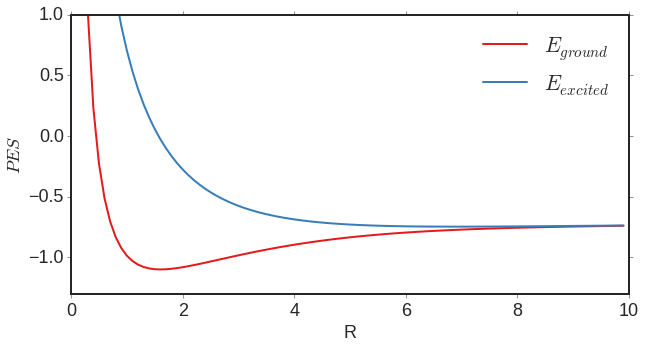

In [74]:
def Eground(R):
    # Translate the formula above into code.
    e = 2*(H11(R)+H12(R))/(1+S12(R))+J11(R)+V(R)
    return e

def Eexcited(R):
    #Translate the formula above into code
    e = 2*(H11(R)- H12(R))/(1-S12(R))+J22(R)+V(R)
    return e

R = np.arange(0.2, 10.0, 0.1)
Rmin = np.argmin(Eground(R))
Emin = np.min(Eground(R))
print('Ground minima at %2.2f Bohr with E=%f Hartrees'%(R[Rmin],Emin))
# Plot Eground and Eexcited as a function of R on the same plot
plt.plot(R,Eground(R),label='$E_{ground}$')
plt.plot(R,Eexcited(R),label='$E_{excited}$')
plt.ylabel('$PES$')
plt.xlabel('R')
plt.ylim(-1.3,1)
plt.legend()
plt.show()

### <i class="fa fa-line-chart"></i>  Plotting hamiltonian elements
It's also useful to plot $J_{11}(R)$, $H_{11}(R)$, and $H_{12}(R)$ on a second figure and $(11,11)(R)$, $(12,12)(R)$, $(11,22)(R)$, and $(11,12)(R)$ on the third figure.


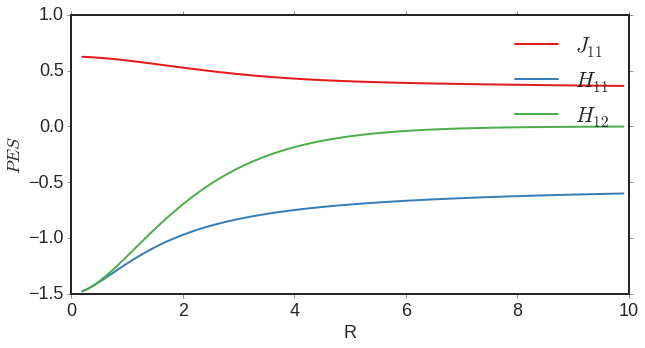

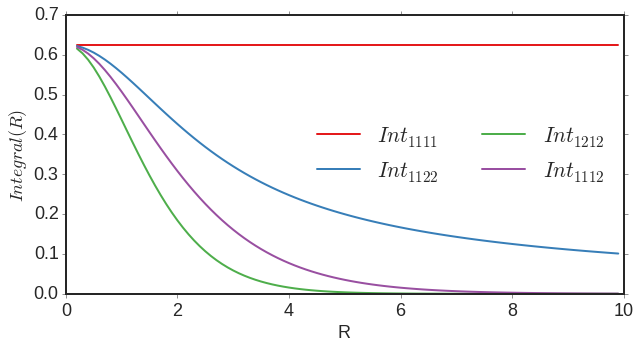

In [43]:
# Plot J11, H11, and H12 as a function of R on the same plot
plt.plot(R,J11(R),label='$J_{11}$')
plt.plot(R,H11(R),label='$H_{11}$')
plt.plot(R,H12(R),label='$H_{12}$')
plt.ylabel('$PES$')
plt.xlabel('R')
plt.legend()
plt.show()
# Plot the 4 integrals, _1111, _1122, _1212, and _1112 as a function of R on the same plot.
# What do you notice?
plt.plot(R,_1111(R),label='$Int_{1111}$')
plt.plot(R,_1122(R),label='$Int_{1122}$')
plt.plot(R,_1212(R),label='$Int_{1212}$')
plt.plot(R,_1112(R),label='$Int_{1112}$')
plt.ylabel('$Integral(R)$')
plt.xlabel('R')
plt.legend(loc='best',ncol=2)
plt.show()

## Step 4:Configuration Interaction

You may have noticed that the ground state PES doesn't converge to two neutral Hydrogen atoms in the infinite separation limit.  We can fix this by saying that because our assumed groundstate wavefunction can mix with some excited state wavefunctions to create a better wavefunction. This is similar to the expansion of the triangle function into sine waves. We found that our approximation to the triangle function got much much better as we included more and more sine functions. In this example, we're going to ask what happens if we mix our groundstate with our excited state. We'll do this by finding the eigenvalues of this matrix:

$$ \left[
  \begin{array}{ c c }
     E_{ground}(R) -V(R) & K_{12}(R) \\
     K_{12}(R) & E_{excited}(R) -V(R)
  \end{array} \right] $$

Where we've built the matrix by computing the following:

$$ \left[
  \begin{array}{ c c }
     \langle \psi_{ground} | H_e | \psi_{ground} \rangle & \langle \psi_{ground} | H_e | \psi_{excited} \rangle \\
     \langle \psi_{excited} | H_e | \psi_{ground} \rangle & \langle \psi_{excited} | H_e | \psi_{excited} \rangle
  \end{array} \right] $$

  
And we'll want to find the eigenvalues of this matrix at the values of R that we're interested in. The smallest eigenvalue is going to provide the CI-corrected groundstate and then largest one is going to be the CI-corrected excited state.

You'll need to fill in the matrix elements of the A matrix in the ECI method, and then run the cell below. What do you see?

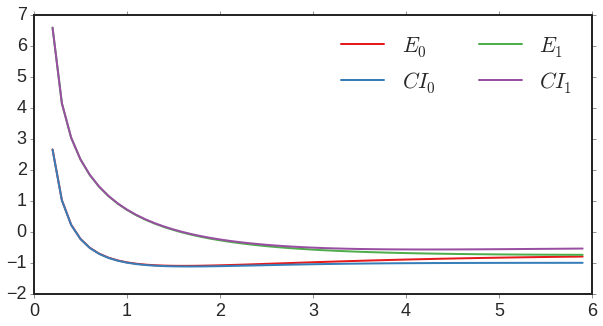

In [60]:
def ECI(R):
    from numpy.linalg import eigh

    # Fill in A using the formula above
    A = np.array([[ Eground(R)-V(R) , K12(R)  ],
                  [ K12(R) , Eexcited(R)-V(R)  ]])
    E, psi = eigh(A)
    return np.min(E), np.max(E)

ci_groundstate = np.zeros_like(R)
ci_excitedstate = np.zeros_like(R)
for i in range(len(R)):
    gE, eE =  ECI(R[i])
    ci_groundstate[i] = gE + V(R[i])
    ci_excitedstate[i] = eE + V(R[i])
    
# Plot Eground(R) vs the ci_groundstate, what do you notice? 
plt.plot(R,Eground(R),label='$E_{0}$')
plt.plot(R,ci_groundstate,label='$CI_{0}$')
plt.legend()
# Plot Eexcited(R) vs the ci_excitedstate, what do you notice? 
plt.plot(R,Eexcited(R),label='$E_{1}$')
plt.plot(R,ci_excitedstate,label='$CI_{1}$')
plt.legend(ncol=2)
plt.show()
